In [8]:
import lasio
import pandas as pd
import os

## GammaRay Logs sample first pick

In [9]:
# Read the Files

las_file_list = []
path = 'Data/'

In [10]:
# View contents of the path, we will see LAS files
files = os.listdir(path)
files

['200a002H094G0200_g12_TVD_MainPass_SelCrv.LAS',
 '200a002H094G0200_g17_TVD_MainPass_SelCrv.LAS',
 '200a002H094G0200_g18_TVD_MainPass_SelCrv.LAS',
 '200a002H094G0200_g8_TVD_MainPass_SelCrv.LAS',
 '200a002H094G0202_g10_TVD_MainPass_SelCrv.LAS',
 '200a002H094G0202_g13_TVD_MainPass_SelCrv.LAS',
 '200a002H094G0202_g4_TVD_MainPass_SelCrv.LAS',
 '200a002H094G0202_g7_TVD_MainPass_SelCrv.LAS',
 '200a004H093P0900_g3_TVD_MainPass_SelCrv.LAS']

In [11]:
for file in files:
    if file.lower().endswith('.las'):
        las_file_list.append(path + file)
        
las_file_list

['Data/200a002H094G0200_g12_TVD_MainPass_SelCrv.LAS',
 'Data/200a002H094G0200_g17_TVD_MainPass_SelCrv.LAS',
 'Data/200a002H094G0200_g18_TVD_MainPass_SelCrv.LAS',
 'Data/200a002H094G0200_g8_TVD_MainPass_SelCrv.LAS',
 'Data/200a002H094G0202_g10_TVD_MainPass_SelCrv.LAS',
 'Data/200a002H094G0202_g13_TVD_MainPass_SelCrv.LAS',
 'Data/200a002H094G0202_g4_TVD_MainPass_SelCrv.LAS',
 'Data/200a002H094G0202_g7_TVD_MainPass_SelCrv.LAS',
 'Data/200a004H093P0900_g3_TVD_MainPass_SelCrv.LAS']

In [17]:
df_list = []


las = lasio.read('Data/200a002H094G0200_g12_TVD_MainPass_SelCrv.LAS')
lasdf = las.df()
lasdf = lasdf.sort_values('DEPT')
    
lasdf['UWI'] = las.well.UWI.value
lasdf['Latitude'] = las.well.LATI.value
lasdf['Longitude'] = las.well.LONG.value
    
lasdf = lasdf.reset_index()
    #lasdf = lasdf.rename(columns={"index": "Depth"})
lasdf = lasdf[['DEPT','UWI']]
lasdf.to_excel(r'C:\Users\aamini\Desktop\LAS_test\Data\*.xlsx',index=False, header=True)
    
    
    


In [20]:
df_list = []

for lasfile in las_file_list:
    las = lasio.read(lasfile)
    lasdf = las.df()
    lasdf = lasdf.sort_values('DEPT')
    
    lasdf['UWI'] = las.well.UWI.value
    lasdf['Latitude'] = las.well.LATI.value
    lasdf['Longitude'] = las.well.LONG.value
    
    lasdf = lasdf.reset_index()
    #lasdf = lasdf.rename(columns={"index": "Depth"})
    lasdf = lasdf[['DEPT','UWI']]
    #lasdf.to_excel(r'C:\Users\aamini\Desktop\14-Feb\Data\lasfile.xlsx',index=False, header=True)
    
    
    
    filename = lasfile + '.xlsx'
    #writer = ExcelWriter(filename, engine='xlsxwriter')
    lasdf.to_excel(filename, index=False)
    #writer.save()

In [98]:
df_list

[              GR               UWI  Latitude  Longitude
 DEPT                                                   
 1745.750     NaN  200a002H094G0200       0.0        0.0
 1745.875     NaN  200a002H094G0200       0.0        0.0
 1746.000     NaN  200a002H094G0200       0.0        0.0
 1746.125  53.283  200a002H094G0200       0.0        0.0
 1746.250  53.127  200a002H094G0200       0.0        0.0
 ...          ...               ...       ...        ...
 2303.750     NaN  200a002H094G0200       0.0        0.0
 2303.875     NaN  200a002H094G0200       0.0        0.0
 2304.000     NaN  200a002H094G0200       0.0        0.0
 2304.125     NaN  200a002H094G0200       0.0        0.0
 2304.250     NaN  200a002H094G0200       0.0        0.0
 
 [4469 rows x 4 columns],
               GR               UWI  Latitude  Longitude
 DEPT                                                   
 39.000       NaN  200A002H094G0200       0.0        0.0
 39.125       NaN  200A002H094G0200       0.0        0.0
 39

In [99]:
workingdf = pd.concat(df_list, sort=True)
workingdf = workingdf.reset_index()
workingdf

,DEPT,CGXT,GR,GRGC,Latitude,Longitude,UWI
0,1745.750,NaN,NaN,NaN,0.000000,0.000000,200a002H094G0200
1,1745.875,NaN,NaN,NaN,0.000000,0.000000,200a002H094G0200
2,1746.000,NaN,NaN,NaN,0.000000,0.000000,200a002H094G0200
3,1746.125,NaN,53.283,NaN,0.000000,0.000000,200a002H094G0200
4,1746.250,NaN,53.127,NaN,0.000000,0.000000,200a002H094G0200
...,...,...,...,...,...,...,...
101822,2419.900,88.406,NaN,133.939,55.586555,-120.041636,200A004H093P0900
101823,2420.000,88.458,NaN,156.386,55.586555,-120.041636,200A004H093P0900
101824,2420.100,88.817,NaN,151.042,55.586555,-120.041636,200A004H093P0900
101825,2420.200,88.792,NaN,144.620,55.586555,-120.041636,200A004H093P0900


In [102]:
workingdf['UWI'].unique()

array(['200a002H094G0200', '200A002H094G0200', '200/a-002-H 094-G-02/02',
       '200A004H093P0900'], dtype=object)

In [103]:
# Libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
grouped = workingdf.groupby('UWI')
grouped.head()

,DEPT,CGXT,GR,GRGC,Latitude,Longitude,UWI
0,1745.750,NaN,NaN,NaN,0.000000,0.000000,200a002H094G0200
1,1745.875,NaN,NaN,NaN,0.000000,0.000000,200a002H094G0200
2,1746.000,NaN,NaN,NaN,0.000000,0.000000,200a002H094G0200
3,1746.125,NaN,53.283,NaN,0.000000,0.000000,200a002H094G0200
4,1746.250,NaN,53.127,NaN,0.000000,0.000000,200a002H094G0200
4469,39.000,NaN,NaN,NaN,0.000000,0.000000,200A002H094G0200
4470,39.125,NaN,NaN,NaN,0.000000,0.000000,200A002H094G0200
4471,39.250,NaN,NaN,NaN,0.000000,0.000000,200A002H094G0200
4472,39.375,NaN,51.086,NaN,0.000000,0.000000,200A002H094G0200
4473,39.500,NaN,51.881,NaN,0.000000,0.000000,200A002H094G0200


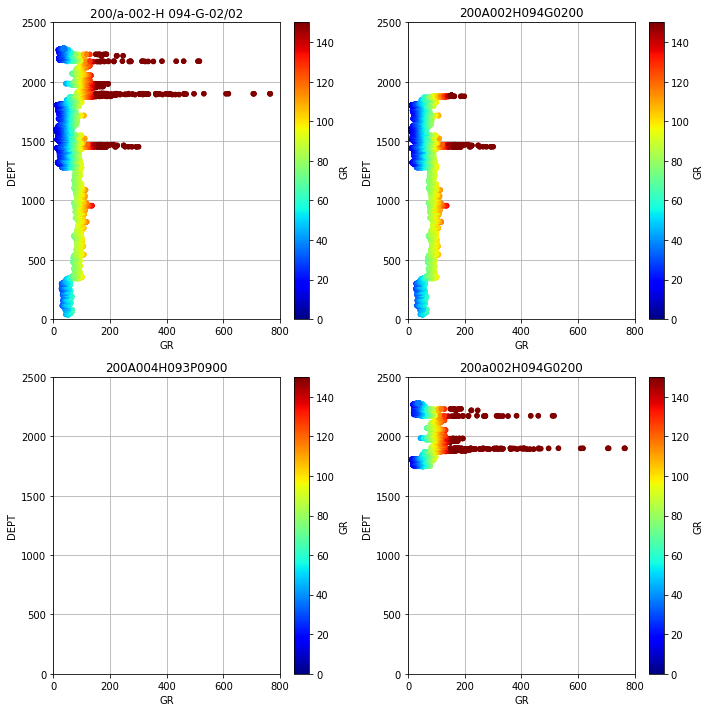

In [108]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='GR', y='DEPT', 
            ax=ax, c='GR', cmap='jet', vmin=0, vmax=150)
    ax.set_xlim(-0.15,800)
    ax.set_ylim(0,2500)
    ax.set_title(name)
    ax.grid(True)
    ax.set_axisbelow(True)
plt.tight_layout()

# One well, 3logs!

In [70]:
las = lasio.read("200a002H094G0202_g13_TVD_MainPass_SelCrv.las")

In [72]:
las.keys()

['DEPT', 'GR']

In [4]:
las.to_excel('las.xlsx')

In [71]:
las.data

array([[2304.25 ,      nan],
       [2304.125,      nan],
       [2304.   ,      nan],
       ...,
       [1746.   ,      nan],
       [1745.875,      nan],
       [1745.75 ,      nan]])

In [78]:
las.data[400:450,1]

array([58.739, 52.869, 45.142, 37.876, 33.129, 31.906, 32.998, 34.397,
       35.004, 35.112, 35.657, 36.963, 38.096, 38.11 , 37.089, 35.762,
       34.626, 34.122, 35.05 , 37.809, 41.387, 43.918, 43.616, 40.179,
       35.291, 31.291, 29.608, 30.37 , 32.278, 33.685, 33.894, 33.453,
       33.239, 33.086, 32.119, 30.044, 27.557, 25.691, 25.006, 25.586,
       27.25 , 29.735, 32.071, 33.522, 34.023, 33.791, 33.131, 32.549,
       32.418, 33.474])

In [73]:
print(las.curves)

Mnemonic  Unit  Value         Description    
--------  ----  -----         -----------    
DEPT      M     09 600 00 00  01  DEPTH      
GR        API   00 310 01 01  07  Gamma Ray  


In [75]:
las.curves.DEPT

CurveItem(mnemonic="DEPT", unit="M", value="09 600 00 00", descr="01  DEPTH", original_mnemonic="DEPT", data.shape=(4469,))

In [58]:
las.well

[HeaderItem(mnemonic="STRT", unit="M", value="2304.25", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="M", value="1745.75", descr="STOP DEPTH"),
 HeaderItem(mnemonic="STEP", unit="M", value="-0.125", descr="STEP"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL"),
 HeaderItem(mnemonic="COMP", unit="", value="PROEX ENERGY LTD.", descr="COMPANY"),
 HeaderItem(mnemonic="WELL", unit="", value="PROEX  N- JULIENNE A-2-H/94-G-2"...),
 HeaderItem(mnemonic="FLD", unit="", value="JULIENNE CREEK NORTH", descr="FIE...),
 HeaderItem(mnemonic="LOC", unit="", value="A-2-H/94-G-2", descr="LOCATION"),
 HeaderItem(mnemonic="PROV", unit="", value="British Columbia", descr="PROVINCE"),
 HeaderItem(mnemonic="UWI", unit="", value="200/a-002-H 094-G-02/02", descr="...),
 HeaderItem(mnemonic="LIC", unit="", value="20010", descr=""),
 HeaderItem(mnemonic="CTRY", unit="", value="CANADA", descr="COUNTRY"),
 HeaderItem(mnemonic="SRVC", unit="", value="PRECISION WIRELINE", descr="SERV

In [7]:
if 'UWI' in las.well:
    print("ok")

ok


In [79]:
print(las.well.UWI.value,las.well.LATI.value,las.well.LONG.value)

200/a-002-H 094-G-02/02 0.0 0.0


In [17]:
print(las.params)

Mnemonic  Unit   Value                Description                   
--------  ----   -----                -----------                   
RUN              1                    Run Number                    
HIDE             TRUE VERTICAL DEPTH  Header Identifier             
DSRC             GovBoard             Digital Data Source           
EGL       M      751.7                Ground Level Elevation        
EREF      M      757.1                Elevation of Depth Reference  
EKB       M      757.2                Elevation of Kelly Bushing    
TDL       M      4089.3               Total Depth Logger            
TDD       M      4098.0               Total Depth Driller           
TLI       M      2.711                Top of Logged Interval        
BLI       M      2420.411             Bottom of Logged Interval     
CSGL      M      368.0                Casing Bottom Logger          
CSGS      MM     244.5                Casing Size                   
CSGW      KG/M   53.57            